# L1 regression of mean energy consumption

In [63]:
 # data and numbers
import numpy as np
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

import pandas as pd
from sklearn import preprocessing

In [64]:
path_raw = "..//data//meters//raw//"
path_meta = "..//data//metadata//"
path_cleaned = "..//data//meters//cleaned//"

In [65]:
columns_to_use = [
    "building_id",
    "site_id",
    "sqm",
    "lat",
    "lng",
    "timezone",
    "industry",
    "subindustry",
    "heatingtype",
    "yearbuilt",
    "date_opened",
    "numberoffloors",
]

In [66]:
meta = pd.read_csv(
    path_meta + "metadata.csv",
    usecols=columns_to_use,
    index_col="building_id"
)
meta = pd.get_dummies(meta)
meta.dropna(inplace=True)
meta.info()
meta.head()

def import_data(metername):
    # load data
    df = pd.read_csv(path_cleaned + metername + ".csv")
    
    # Transform timestamp to datetime object type
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
    df.set_index("timestamp", inplace=True)
    df.info()
    return df

sensor_data = import_data("electricity_cleaned")

# from meta, drop rows that are not in sensor_data index
meta = meta[meta.index.isin(sensor_data.columns)]

# split meta into train and test with sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(meta, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, Robin_education_Lashandra to Mouse_science_Micheal
Data columns (total 79 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   sqm                                                303 non-null    float64
 1   lat                                                303 non-null    float64
 2   lng                                                303 non-null    float64
 3   yearbuilt                                          303 non-null    float64
 4   numberoffloors                                     303 non-null    float64
 5   site_id_Bear                                       303 non-null    bool   
 6   site_id_Bobcat                                     303 non-null    bool   
 7   site_id_Bull                                       303 non-null    bool   
 8   site_id_Cockatoo                                   30

In [67]:
mean_sensor_data = sensor_data.mean()
mean_sensor_data.info()
print(mean_sensor_data)

<class 'pandas.core.series.Series'>
Index: 1578 entries, Panther_parking_Lorriane to Mouse_science_Micheal
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1572 non-null   float64
dtypes: float64(1)
memory usage: 89.2+ KB
Panther_parking_Lorriane      10.722723
Panther_lodging_Cora         135.054565
Panther_office_Hannah          6.683938
Panther_lodging_Hattie       140.593488
Panther_education_Teofila    156.466222
                                ...    
Mouse_lodging_Vicente         45.767561
Mouse_health_Justin          783.350343
Mouse_health_Ileana           43.587324
Mouse_health_Estela          384.684218
Mouse_science_Micheal        435.844964
Length: 1578, dtype: float64


In [68]:
# add mean_sensor_data as column to train_meta by index
print("Train")
train['mean_sensor_data'] = mean_sensor_data
train.info()

print("Test")
test['mean_sensor_data'] = mean_sensor_data
test.info()

Train
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, Lamb_education_Camille to Bear_education_Sharon
Data columns (total 80 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   sqm                                                240 non-null    float64
 1   lat                                                240 non-null    float64
 2   lng                                                240 non-null    float64
 3   yearbuilt                                          240 non-null    float64
 4   numberoffloors                                     240 non-null    float64
 5   site_id_Bear                                       240 non-null    bool   
 6   site_id_Bobcat                                     240 non-null    bool   
 7   site_id_Bull                                       240 non-null    bool   
 8   site_id_Cockatoo                                  

/home/stefkoma/anaconda3/envs/llm_tutorial/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.090e+05, tolerance: 1.246e+03
  model = cd_fast.enet_coordinate_descent(


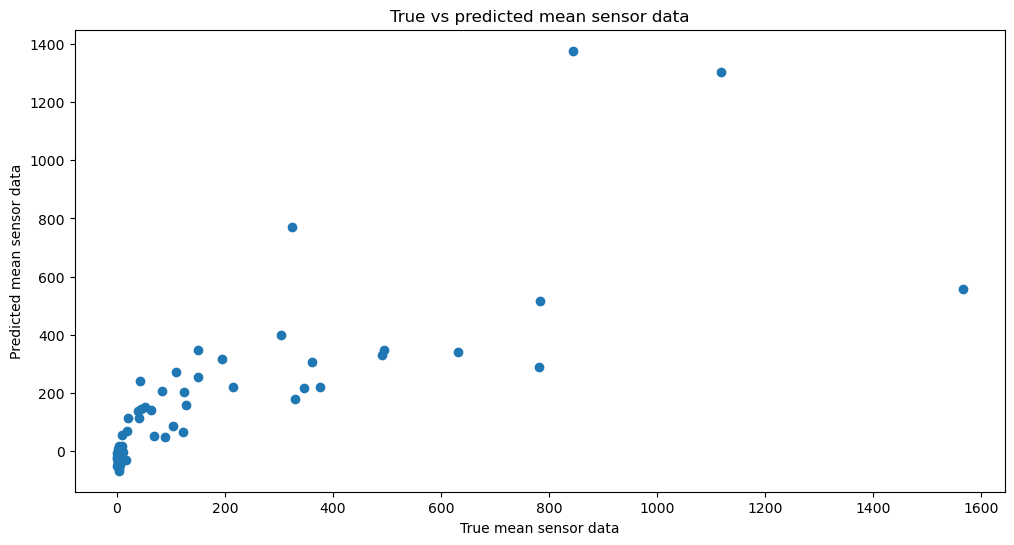

In [69]:
# drop NaN values
train.dropna(inplace=True)
test.dropna(inplace=True)

# Train linear regression model using L1 regularization on dataframe train, where column mean_sensor_data is the target
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train.drop(columns=["mean_sensor_data"]), train["mean_sensor_data"])

# Predict mean_sensor_data on test
test["predicted_mean_sensor_data"] = lasso_model.predict(test.drop(columns=["mean_sensor_data"]))
test["predicted_mean_sensor_data"].head()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(test["mean_sensor_data"], test["predicted_mean_sensor_data"])
plt.xlabel("True mean sensor data")
plt.ylabel("Predicted mean sensor data")
plt.title("True vs predicted mean sensor data")
plt.show()
